In [ ]:
'''-----feature engineering-----'''

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = 'NAB-master/data/realKnownCause/ambient_temperature_system_failure.csv'
#performing the Non-Standart Missing Values checking
missing_values = ["n/a", "na", "--"]
df = pd.read_csv(filename, na_values = missing_values)

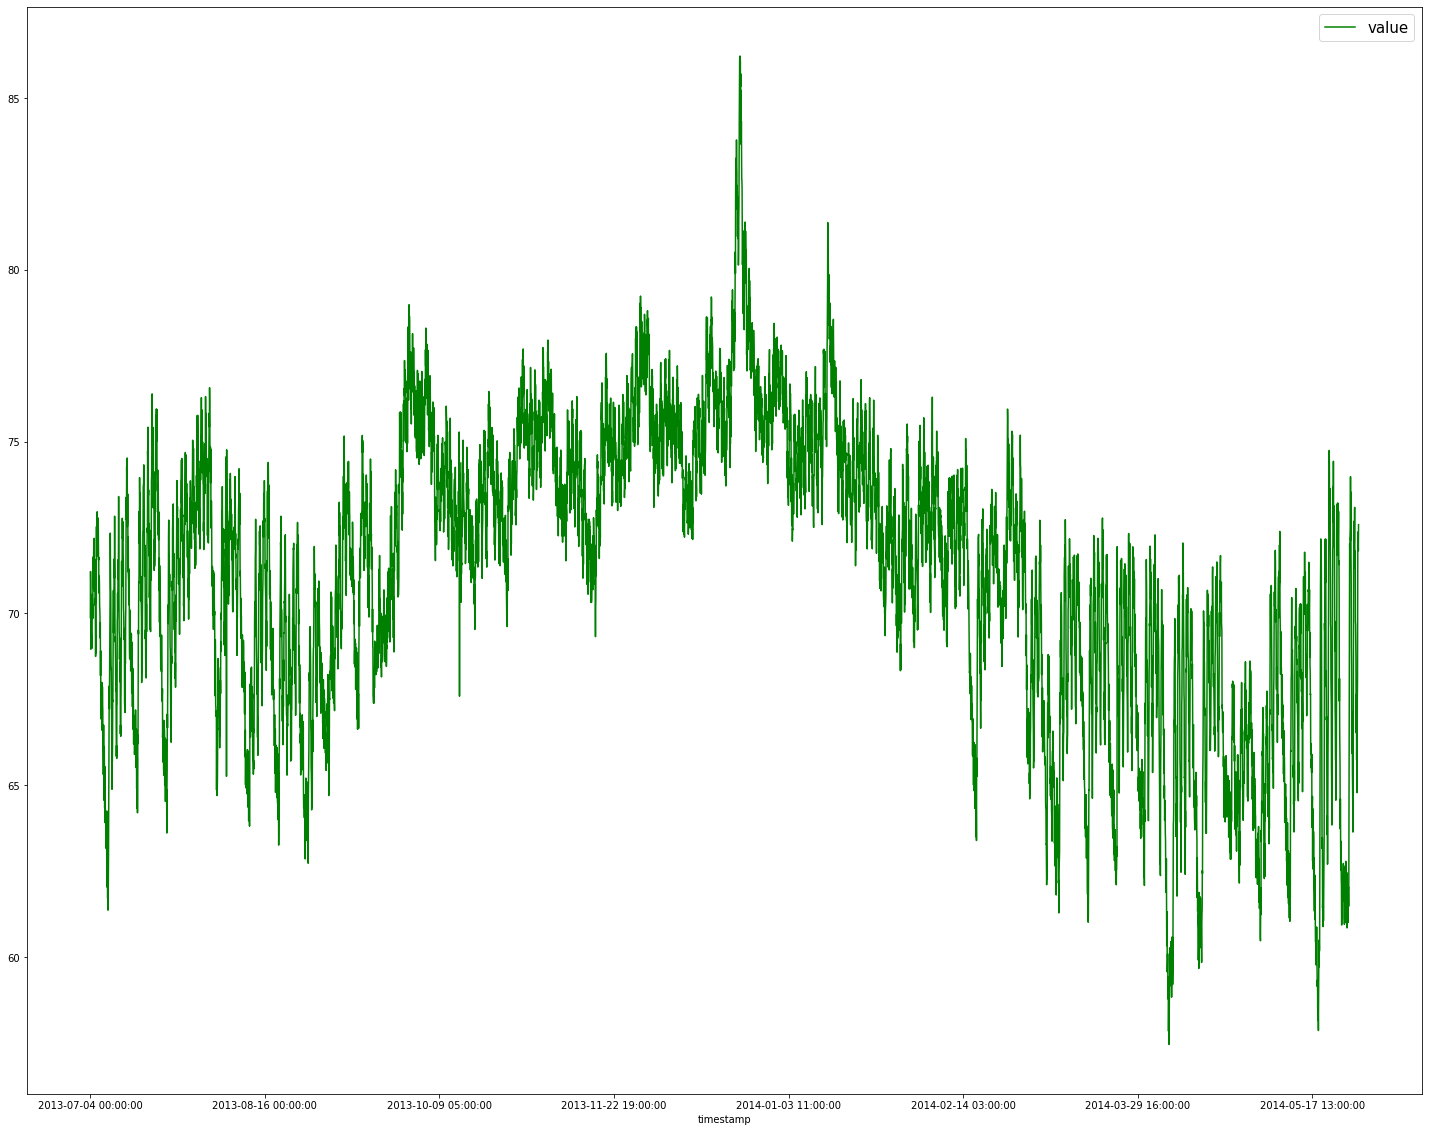

In [3]:
# plt.figure(figsize=(1000, 200))

#plotting the data; could make it fancier though
df.plot(x='timestamp',x_compat=True,style='g', figsize=(25, 20))
plt.legend(fontsize=15)

In [4]:
# dealing with features; adding hours, weekday etc
def season_of_date(day):
    spring = range(80, 172)
    summer = range(172, 264)
    fall = range(264, 355)
    # winter = everything else

    if day in spring:
        return 'spring'
    elif day in summer:
        return 'summer'
    elif day in fall:
        return 'fall'
    else:
        return 'winter'

datepoints = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['hours'] = datepoints.dt.hour
df['weekday'] = datepoints.dt.weekday
# df['daylight'] = ...extract here the daylight info using time.daylight; problem: cannot access the whole series as its type is datetime64[ns]
# df['daylight'] = datepoints.dt.time.daylight ???
df['isweekend'] = df['weekday']>=5
df['dayofyear'] = datepoints.dt.dayofyear
df['year'] = datepoints.dt.year
df['season'] = datepoints.dt.dayofyear.map(season_of_date)
df

,timestamp,value,hours,weekday,isweekend,dayofyear,year,season
0,2013-07-04 00:00:00,69.880835,0,3,False,185,2013,summer
1,2013-07-04 01:00:00,71.220227,1,3,False,185,2013,summer
2,2013-07-04 02:00:00,70.877805,2,3,False,185,2013,summer
3,2013-07-04 03:00:00,68.959400,3,3,False,185,2013,summer
4,2013-07-04 04:00:00,69.283551,4,3,False,185,2013,summer
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,2,False,148,2014,spring
7263,2014-05-28 12:00:00,72.172956,12,2,False,148,2014,spring
7264,2014-05-28 13:00:00,72.046565,13,2,False,148,2014,spring
7265,2014-05-28 14:00:00,71.825226,14,2,False,148,2014,spring


In [5]:
# now we're gonna compare the values through the days (for 2013)
df_2013 = df[df['year']==2013]
df_2013
df_by_hours_2013 = df_2013.pivot(index="hours", columns="dayofyear", values="value")

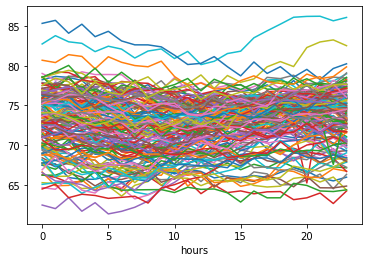

In [6]:
df_by_hours_2013.plot(legend=False)
# so there's very uninformative plot as it is too much info, even for a half of a year

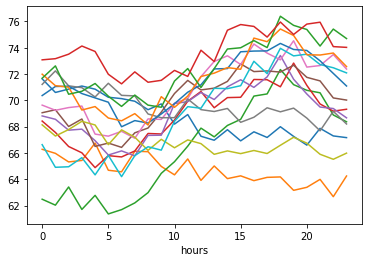

In [7]:
# lets compare just some days
df_by_hours_2013.loc[:,187:200].plot(legend=False)
#still uninformative 

In [102]:
# ideas for further visualisation:
# compare (average) weekends and business days
# compare by weekday
# compare trhrough months
# appply other on-built types of plots

In [8]:
#split data into train and test dataset

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df)
df_train
df_test

,timestamp,value,hours,weekday,isweekend,dayofyear,year,season
6241,2014-04-15 22:00:00,68.414514,22,1,False,105,2014,spring
5484,2014-03-07 12:00:00,66.884786,12,4,False,66,2014,winter
6113,2014-04-03 09:00:00,68.923096,9,3,False,93,2014,spring
7045,2014-05-19 10:00:00,63.305654,10,0,False,139,2014,spring
436,2013-07-22 04:00:00,64.658453,4,0,False,203,2013,summer
...,...,...,...,...,...,...,...,...
4308,2014-01-16 07:00:00,73.665971,7,3,False,16,2014,winter
1042,2013-08-17 18:00:00,69.115906,18,5,True,229,2013,summer
3429,2013-12-10 16:00:00,74.005510,16,1,False,344,2013,fall
1750,2013-09-24 20:00:00,72.640799,20,1,False,267,2013,fall


In [104]:
'''----data preprocessing----'''

'----data preprocessing----'

In [9]:
# find and filter out missing and incorrect values
#Missing Values
print('subdataframe with missing timestamp: \n',df[df['timestamp'].isnull()],'\n')
print('subdataframe with missing value: \n',df[df['value'].isnull()], '\n')
print('total missings by feature:\n',df.isnull().sum())
print('if there\'s any missing value:\n', df.isnull().values.any())

subdataframe with missing timestamp: 
 Empty DataFrame
Columns: [timestamp, value, hours, weekday, isweekend, dayofyear, year, season]
Index: [] 

subdataframe with missing value: 
 Empty DataFrame
Columns: [timestamp, value, hours, weekday, isweekend, dayofyear, year, season]
Index: [] 

total missings by feature:
 timestamp    0
value        0
hours        0
weekday      0
isweekend    0
dayofyear    0
year         0
season       0
dtype: int64
if there's any missing value:
 False


In [10]:
#Incorrect Values
#Assuming there's value in incorrect format unifying it
from numpy import nan
i = 0
for row in df['value']:
    try:
        float(row)
    except ValueError:
        df.loc[cnt, 'value'] = nan
    i += 1
print(df.isnull().values.any())

False


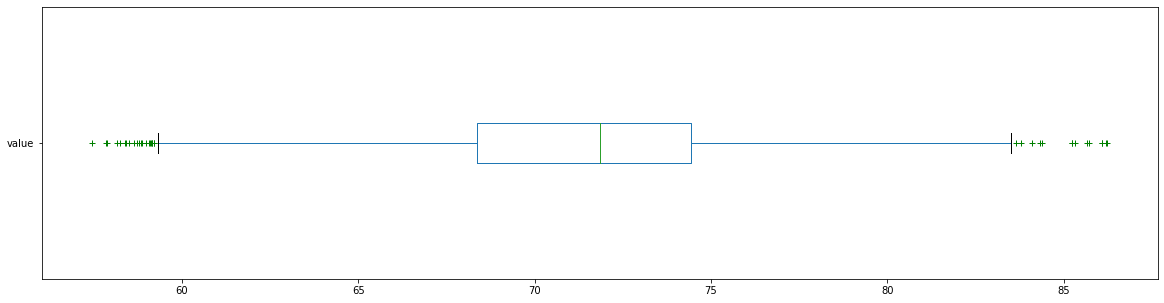

In [11]:
#discover outliers
#box plot
df['value'].plot.box(vert=False,sym="g+", figsize=(20, 5))

#so here we observe a set of low-temperatue values and high, but as they're not so distanced from median, I suppose it just caused by seasonal wavering

season
fall      5248
spring    5806
summer    5609
winter    5138
dtype: int64


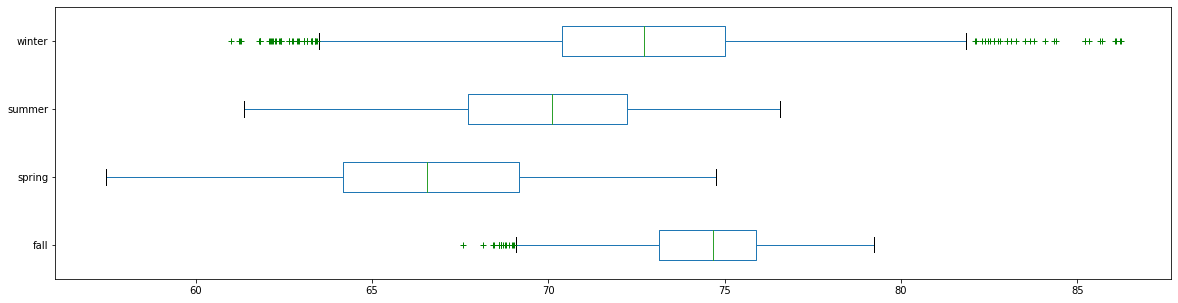

In [12]:
#lets discrete the values by season
df['season'].unique()
df
df_seasons = df.pivot(columns="season", values="value")
print(df_seasons.isnull().sum())
df_seasons.plot.box(vert=False,sym="g+", figsize=(20, 5))
#i did not come across with fancier indexing, lucky me box plotting ignores NA values...
#however, it might be so unexpected that summer and spring are cooler in average

In [13]:
#z-score
# The Z-score is the signed number of standard deviations 
# by which the value of an observation or data point is above 
# the mean value of what is being observed or measured.

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['value']))
threshold = 3
print(np.where(z > 3)) #now we have an array with all the outliners indexes, for example:
print(df.loc[3718])
#I suppose that it is not a one-hint outliners, as there are several inline indexes! The values are smooth

(array([3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728,
       3730, 6177, 6178, 6180, 6181, 7034, 7035, 7036], dtype=int64),)
timestamp    2013-12-22 17:00:00
value                    84.3909
hours                         17
weekday                        6
isweekend                   True
dayofyear                    356
year                        2013
season                    winter
Name: 3718, dtype: object


In [14]:
#IQR
# The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical 
# dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
# In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box 
# plot on the data.
# It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df[(df['value'] < (Q1 - 1.5 * IQR)) |(df['value'] > (Q3 + 1.5 * IQR))].count() #the dataframe that contains all the outliners

6.061547350000012


timestamp    35
value        35
hours        35
weekday      35
isweekend    35
dayofyear    35
year         35
season       35
dtype: int64

In [15]:
#now we can deal with outliners -- by simply removing them or by K-Mean clustering; thus I may return to this later
#removing outliners by z-score
df_removed_by_zscore = df[(z < 3)]
print(df.shape)
print(df_removed_by_zscore.shape)

(7267, 8)
(7248, 8)


In [16]:
# removing outliners by IQR
df_removed_by_iqr = df[~((df['value'] < (Q1 - 1.5 * IQR)) |(df['value'] > (Q3 + 1.5 * IQR)))]
df_removed_by_iqr.shape

(7232, 8)